In [55]:
from bs4 import BeautifulSoup 
import urllib.request
import csv
import time

In [57]:
with open('yelpdata2.csv','a') as file:
    file.write('Rank,Store,Rating,No. of Reviews,Telephone,Address,District\n')

In [58]:
def bsoup(url):    
    ourUrl = urllib.request.urlopen(url)
    soup = BeautifulSoup(ourUrl,'html.parser')
    return soup

In [64]:
infoList = []
for i in range(0,91,10):    
    url = "https://www.yelp.com/search?find_desc=Ice%20Cream&find_loc=10023&start="+str(i)
    soup = bsoup(url)
    for all_info in soup.find_all('div',{'class':'lemon--div__373c0__1mboc searchResult__373c0__1yggB border-color--default__373c0__2oFDT'}):
        phoneNo = 'None'
        district = 'None'
        address = 'None'
        rank_name = all_info.find('p',{'class':'lemon--p__373c0__3Qnnj text__373c0__2pB8f text-color--black-regular__373c0__38bRH text-align--left__373c0__2pnx_ text-size--inherit__373c0__2gFQ3'})
        rn = rank_name.get_text()
        if rn[0].isdigit() and ('.' in rn):
            rn2 = rn.split('.')
            ranking = rn2[0]
            store_name = rn2[1]
            rating = all_info.find('div',{'class':'lemon--div__373c0__1mboc attribute__373c0__1hPI_ display--inline-block__373c0__2de_K u-space-r1 border-color--default__373c0__2oFDT'}).find('span',{'class':'lemon--span__373c0__3997G display--inline__373c0__1DbOG border-color--default__373c0__2oFDT'}).find('div')['aria-label']
            review_number = all_info.find('span',{'class':'lemon--span__373c0__3997G text__373c0__2pB8f reviewCount__373c0__2r4xT text-color--mid__373c0__3G312 text-align--left__373c0__2pnx_'}).get_text()
            three_ele = all_info.find('div',{'class':'lemon--div__373c0__1mboc container__373c0__19wDx u-padding-l2 border-color--default__373c0__2oFDT text-align--right__373c0__3fmmn'}).get_text("\n", strip=True)
            three = three_ele.split('\n')
            for element in three:
                if '(' in element:
                    phoneNo = element
                elif all(x.isalpha() or x.isspace() for x in element):
                    district = element
                else:
                    address = element
            infoList.append([ranking,store_name,rating,review_number,phoneNo,address,district])
            print(ranking,store_name,rating,review_number,phoneNo,district,address)       

11  A La Mode Shoppe 4.5 star rating 86 reviews (917) 639-3401 Midtown East 360 E 55th St
12  Amorino Gelato 4.5 star rating 188 reviews (212) 877-5700 Upper West Side 414 Amsterdam Ave
13  Holey Cream 3 star rating 987 reviews (212) 247-8400 None Hell's Kitchen
14  16 Handles x Mochidoki 4 star rating 26 reviews (212) 664-9608 None Hell's Kitchen
15  Amorino Gelato 4.5 star rating 702 reviews (212) 445-0101 Midtown West 721 8th Ave
16  Häagen-Dazs 2.5 star rating 43 reviews (212) 787-7165 Upper West Side 263 Amsterdam Ave
17  16 Handles - UWS Amsterdam 4 star rating 188 reviews (646) 861-1281 Upper West Side 325 Amsterdam Ave
18  Jacques Torres Chocolate 4 star rating 273 reviews (212) 787-3256 Upper West Side 285 Amsterdam Ave
19  Levain Bakery 4.5 star rating 7840 reviews (917) 464-3769 Upper West Side 167 W 74th St
20  Twister Cake Bakery 5 star rating 4 reviews (347) 946-2141 Upper West Side None
21  Schmackary’s 4 star rating 1937 reviews (646) 801-9866 Midtown West 362 W 45th St

In [65]:
with open ('yelpdata2.csv','a') as file:
    for item in infoList:
        file.write('{},{},{},{},{},{},{}'.format(item[0],item[1],item[2],item[3],item[4],item[5],item[6]))
        file.write('\n')

Diagram
======

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('yelpdata.csv',header = 0,encoding = 'unicode_escape' )

In [134]:
df.head()

,Rank,Store,Rating,No. of Reviews,Telephone,Address,District
0,1,Van Leeuwen Artisan Ice Cream,4.5 star rating,12 reviews,(917) 388-2904,1250 6th Ave,Theater District
1,2,Emack and Bolios,4 star rating,286 reviews,(212) 362-2747,389 Amsterdam Ave,Upper West Side
2,3,Van Leeuwen Ice Cream,4.5 star rating,23 reviews,(646) 368-9195,253 Columbus Ave,Upper West Side
3,4,Grom,4 star rating,594 reviews,(212) 974-3444,1796 Broadway,Midtown West
4,5,CoolMess,4 star rating,154 reviews,(212) 355-9834,137 E 62nd St,Upper East Side


In [4]:
type(df)

pandas.core.frame.DataFrame

In [113]:
from matplotlib import pyplot as plt

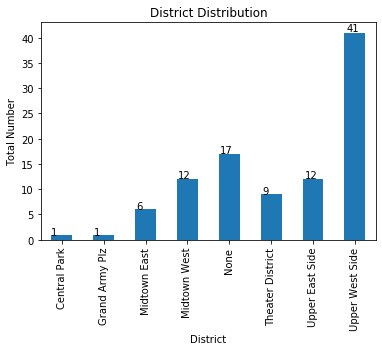

In [164]:
# The following shows the distribution of the stores
locations = df.groupby('District')
locations.size()
ax=locations.size().plot(kind='bar',title='District Distribution')
plt.ylabel('Total Number')


In [136]:
i = 0
for row in df['Rating']:
    df['Rating'][i] = float(df['Rating'][i][:-12])
    i+=1

C:\Users\yangm\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


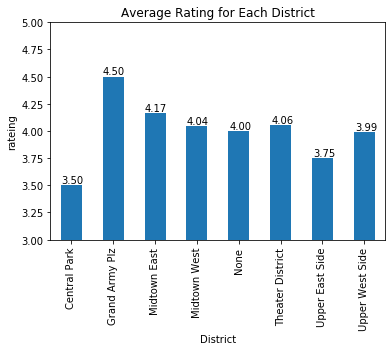

In [151]:
# This diagram shows the average score of each store.
ratings = pd.to_numeric(df['Rating']).groupby(df['District'])
ax = ratings.mean().plot(kind = 'bar',title= 'Average Rating for Each District',ylim=(3.0,5.0),)
plt.ylabel('rateing')
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() * 1.005, p.get_height() * 1.005))